# Examples how to use scripts in this repository

In [1]:
from samplers import *
from solvers import *
from plots import  *
from matplotlib import pylab
from pylab import rcParams
rcParams['figure.figsize'] = 5, 3

# Single run of ALS algorithm
Below are two examples of generating plynomials, using a solver and plotting the resutls.

In the first example the distance from the camera is equal to the assumed distance, and in the second case it is different. 

In [21]:
start_param = [6, -10, 5, 0.5]
N = 2*(len(start_param))
assumend_distance = 1
true_distance = assumed_distace
polynomial = SecondSurfacePolynomial(start_param)
plot_results(polynomial, 'k', lw=1, label='polynomial')
sampler = SurfaceSampler(polynomial, N, [-0.6, true_distance, assumed_distance], interval_length=1, sigma=0.0)
sample_values = sampler.sample_values; 

start_pos = SecondSurfacePolynomial.shifted_positions(sampler.sample_positions, trace_param=[0, 1, assumed_distace])
stem_results(start_pos, sample_values, 'k', label="start. positions")

solver = ConstrainedALS(
    sample_values,
    polynomial.model_size,
    SecondSurfacePolynomial,
    start_pos=sampler.sample_positions,
    stopping_error=1e-10,
    beta=1,
    show_plots=False,
    max_iter=10000,
    fl=assumed_distace
    )
solver.solve()

stem_results(solver.get_position_estimates(), solver.get_samples(), 'g', label="positions found")
polynomial = FullSurfacePolynomial(solver.parameter_estimate)
plot_results(polynomial, 'g', lw =1, label='recovered')

pylab.title("initialised with correct scale", fontsize=10)
pylab.xlabel(r'$t$', fontsize=10)
pylab.legend(loc="lower right", fontsize=10)
pylab.gcf().subplots_adjust(bottom=0.15)
pylab.show()

NameError: name 'assumed_distace' is not defined

error small enough after fitting parameters


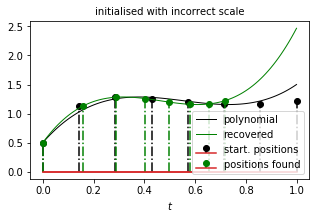

In [3]:
start_param = [6, -10, 5, 0.5]
N = 2*(len(start_param))
assumed_distace = 1.0
true_distance = 1.2
polynomial = SecondSurfacePolynomial(start_param)
plot_results(polynomial,'k',lw=1, label='polynomial')
sampler = SurfaceSampler(polynomial,N,[-0.6, true_distance, assumed_distance], interval_length=1, sigma=0.0)
sample_values = sampler.sample_values; 

start_pos = SecondSurfacePolynomial.shifted_positions(sampler.sample_positions,trace_param=[0, 1, assumed_distace])
stem_results(start_pos,sample_values,'k',label="start. positions")

solver = ConstrainedALS(
    sample_values,
    polynomial.model_size,
    SecondSurfacePolynomial,
    start_pos=sampler.sample_positions,
    stopping_error=1e-10,
    beta=1,
    show_plots=False,
    max_iter=10000,
    fl=assumed_distance
    )
solver.solve()

stem_results(solver.get_position_estimates(),solver.get_samples(),'g',label="positions found")
polynomial = FullSurfacePolynomial(solver.parameter_estimate)
plot_results(polynomial,'g',lw =1, label='recovered')

pylab.title("initialised with incorrect scale", fontsize=10)
pylab.xlabel(r'$t$',fontsize=10)
pylab.legend(loc="lower right", fontsize=10)
pylab.gcf().subplots_adjust(bottom=0.15)
pylab.show()

# Running many numerical experiments
Numerical experiments are running based on a paramteters written down in the sorted set.
The script `prepare_tests` generates and saves such set. Then the script `surface_experiments` loads the set of parameters and run actuall experiments. 

Below is example how to generate set of experiment parameters and then run the experiments, and then finally plot them. 

In [4]:
import pickle
import numpy.random as nr
import numpy as np
from sortedcontainers import SortedSet
from surface_experiments import *
from plots import *

### Prepare tests
Create set of parameters as in `surface_experiments` sript.

In [12]:
test_set = SortedSet([])
all_degrees = SortedSet([])
new_params = True

noises = np.linspace(-1, 0, 10)

for polynomial_degree in [5]:
    for ovs in [1, 2, 4, 8]:
        for noise_scale in noises:
            test_set.add((polynomial_degree, ovs, noise_scale))
            all_degrees.add(polynomial_degree)

if new_params:
    for polynomial_degree in all_degrees:
        params = nr.randn(n_tests, polynomial_degree)
        params[:, 0] = 0.5
        np.savetxt("example_polynomials" + str(polynomial_degree) + ".csv", params, delimiter=",")


In [19]:
save = True
plots = False
verbose = False
n_tests = 2  # number of tests (should be at least two)
directory = "example_results/"
f = 1.0  # distance between the origin and the image plane
b = 1.0  # intersection between camera axis and the surface
slopes = np.linspace(-np.pi / 9, np.pi / 9, 13)


def test_block_unpack(t):
    return test_block(t[0], t[1], t[2], n_tests, slopes, verbose, save, directory, b, f, plots)


for t in test_set:
    print(t)

# start 4 worker processes
pool = Pool(processes=4)
pool.map(test_block_unpack, test_set);

(5, 1, -1.0)
(5, 1, -0.8888888888888888)
(5, 1, -0.7777777777777778)
(5, 1, -0.6666666666666667)
(5, 1, -0.5555555555555556)
(5, 1, -0.4444444444444444)
(5, 1, -0.33333333333333337)
(5, 1, -0.22222222222222232)
(5, 1, -0.11111111111111116)
(5, 1, 0.0)
(5, 2, -1.0)
(5, 2, -0.8888888888888888)
(5, 2, -0.7777777777777778)
(5, 2, -0.6666666666666667)
(5, 2, -0.5555555555555556)
(5, 2, -0.4444444444444444)
(5, 2, -0.33333333333333337)
(5, 2, -0.22222222222222232)
(5, 2, -0.11111111111111116)
(5, 2, 0.0)
(5, 4, -1.0)
(5, 4, -0.8888888888888888)
(5, 4, -0.7777777777777778)
(5, 4, -0.6666666666666667)
(5, 4, -0.5555555555555556)
(5, 4, -0.4444444444444444)
(5, 4, -0.33333333333333337)
(5, 4, -0.22222222222222232)
(5, 4, -0.11111111111111116)
(5, 4, 0.0)
(5, 8, -1.0)
(5, 8, -0.8888888888888888)
(5, 8, -0.7777777777777778)
(5, 8, -0.6666666666666667)
(5, 8, -0.5555555555555556)
(5, 8, -0.4444444444444444)
(5, 8, -0.33333333333333337)
(5, 8, -0.22222222222222232)
(5, 8, -0.11111111111111116)
(5, 

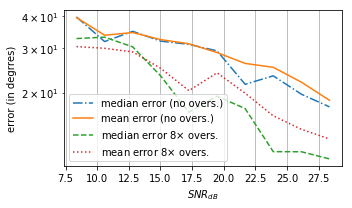

In [20]:
n_pow = np.linspace(-1, 0, 10)
n_len = len(n_pow)

results = np.empty((2, 4, n_len))
all_errors = np.empty((4, n_len, n_tests*13))
all_power = np.empty((4, n_len, n_tests*13))
n = 5

for (overs, idx) in zip([1, 2, 4, 8], range(4)):
    for (nl, n_idx) in zip(n_pow, range(len(n_pow))):
        code = code = "{}_{}_{:.2f}".format(n, overs,nl)
        power = np.load('example_results/pow_' + code + '.npy')
        errors = np.load('example_results/errors_' + code + '.npy')
        errors[np.isnan(errors)]=1
        results[0, idx, n_idx] = np.degrees(np.percentile(errors, q=50))
        results[1, idx, n_idx] = np.degrees(np.mean(errors.flatten()))
        all_power[idx, n_idx,:] = power.flatten()
        all_errors[idx, n_idx,:] = errors.flatten()
        
snr = 10*(np.log(np.mean(all_power.flatten())) + 2 * n_pow)
beg = 0
fig = plt.figure()
plt.semilogy(snr[beg:], results[0,0,beg:].T, "-.")
plt.semilogy(snr[beg:], results[1,0,beg:].T)
plt.semilogy(snr[beg:], results[0,3,beg:].T, "--")
plt.semilogy(snr[beg:], results[1,3,beg:].T, ":")
plt.xlabel(r"$SNR_{dB}$")
plt.ylabel("error (in degrres)")
plt.legend([r"median error (no overs.)", r"mean error (no overs.)", r"median error 8$\times$ overs.", r"mean error 8$\times$ overs."], loc='best')
plt.grid()
plt.tight_layout()
plt.show()
fig.savefig('snr2.pdf')